# Dataset Distribution visualization

### Filtered Davis

#### Get the Length values of proteins

In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm  
import os
import warnings
from Bio import PDB

In [2]:
fdavis_proteins = pd.read_csv('../../../data/dta-datasets/Davis/davis_proteins.csv')
fdavis_proteins

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
...,...,...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543,NaN,NaN
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426,NaN,NaN
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328,NaN,NaN
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800,NaN,NaN


In [3]:
fdavis_unique_proteins = fdavis_proteins.drop_duplicates(subset=['PDBID'])
fdavis_unique_proteins

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
16,ABL2,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGF...,NP_005149.3,ABL2,P42684,1182,NaN,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...
17,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,NP_001096.1,ACVR1,Q04771,509,D3DPA4,NaN
18,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,NP_004293.1,ACVR1B,P36896,505,NaN,NaN
...,...,...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543,NaN,NaN
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426,NaN,NaN
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328,NaN,NaN
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800,NaN,NaN


In [4]:
length_df = pd.DataFrame(columns=['Target_Length'])  
length_df

,Target_Length


In [5]:
len(fdavis_unique_proteins['PDBID'].unique())

379

In [6]:
for index, row in fdavis_unique_proteins.iterrows():
    aa = fdavis_unique_proteins["Sequence"][index]
    length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_23244\2602343091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)


In [7]:
length_df

,Target_Length
0,961
1,1167
2,1182
3,509
4,505
...,...
374,543
375,426
376,1328
377,800


In [8]:
length_df.to_csv('../../../result/csv_output/dataset_length/filtered_davis_protein_length.csv', index=False)

#### Get the Length values of drugs

In [9]:
fdavis_drugs = pd.read_csv('../../../data/dta-datasets/Davis/davis_ligands.csv')
fdavis_drugs

,PubChemID,SMILES
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...
...,...,...
63,5494449,CC1=CC(=NN1)NC2=NC(=NC(=C2)N3CCN(CC3)C)SC4=CC=...
64,3038525,C1=CC(=C(C(=C1)Cl)C2=C3C=CC(=NN3C=NC2=O)SC4=C(...
65,3081361,CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C...
66,9809715,CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)NC(=C3C4=C(C...


In [10]:
length_df = pd.DataFrame(columns=['Drug_Length'])  
length_df

,Drug_Length


In [11]:
for index, row in fdavis_drugs.iterrows():
    smiles = fdavis_drugs["SMILES"][index]
    length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_24256\3165815642.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)


In [12]:
length_df

,Drug_Length
0,51
1,77
2,72
3,48
4,67
...,...
63,64
64,61
65,57
66,79


In [13]:
length_df.to_csv('../../../result/csv_output/dataset_length/filtered_davis_drug_length.csv', index=False)

#### Get the Length values of affinities

In [15]:
fdavis_datasets = pd.read_csv('../../../data/dta-datasets/Davis/davis_filtered_datasets.csv')
fdavis_datasets

,Unnamed: 0,Drug_ID,Drug,Target_ID,Target,Y,PDB_File,Drug_Index,protein_Index
0,0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532,AF-Q2M2I8-F1-model_v4.pdb,0,0
1,24,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AKT1,MSDVAIVKEGWLHKRGEYIKTWRPRYFLLKNDGTFIGYKERPQDVD...,7.119186,AF-P31749-F1-model_v4.pdb,0,24
2,25,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AKT2,MNEVSVIKEGWLHKRGEYIKTWRPRYFLLKSDGSFIGYKERPEAPD...,5.537602,AF-P31751-F1-model_v4.pdb,0,25
3,26,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AKT3,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...,6.744727,AF-Q9Y243-F1-model_v4.pdb,0,26
4,36,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AURKC,MSSPRAVVQLGKAQPAGEELATANQTAQQPSSPAMRRLTVDDFEIG...,5.075721,AF-Q9UQB9-F1-model_v4.pdb,0,36
...,...,...,...,...,...,...,...,...,...
9120,29912,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,PDGFRB,AASEPDTAGSVRGLPTAHCPVVQDNRTLGDSSAGEIALSTRNVSET...,7.602060,AF-P09619-F1-model_v4.pdb,67,298
9121,29970,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,RET(M918T),MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,5.119186,AF-P07949-F1-model_v4.pdb,67,356
9122,30044,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,VEGFR2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,7.207608,AF-P35968-F1-model_v4.pdb,67,430
9123,30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246,AF-Q56UN5-F1-model_v4.pdb,67,439


In [16]:
length_df = pd.DataFrame(columns=['Affinity_Values'])  
length_df

,Affinity_Values


In [17]:
for index, row in fdavis_datasets.iterrows():
    affinity = fdavis_datasets["Y"][index]
    length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_24256\416273741.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)


In [18]:
length_df

,Affinity_Values
0,7.366532
1,7.119186
2,5.537602
3,6.744727
4,5.075721
...,...
9120,7.602060
9121,5.119186
9122,7.207608
9123,5.721246


In [19]:
length_df.to_csv('../../../result/csv_output/dataset_length/filtered_davis_affinity_length.csv', index=False)

#### pLDDT Score of each residue

In [4]:
pLDDT_list = []
for index in tqdm(fdavis_unique_proteins.index, total=fdavis_unique_proteins.shape[0]): 
    current_pdb = fdavis_unique_proteins.at[index, 'PDBID']
    file_path = "../../../data/dta-datasets/Davis/pdb/"
    input_name = "AF-" + current_pdb + "-F1-model_v4.pdb"
    input_file = os.path.join(file_path, input_name)

    # 创建一个 PDB 解析器
    parser = PDB.PDBParser(QUIET=True)
    # 读取pdb 文件
    structure = parser.get_structure('protein', input_file)
    # 提取残基的属性
    score_list = []
    for model in structure:
        for chain in model:
            for residue in chain:
                bfactor = 0
                for atom in residue:
                    if bfactor == 0:
                        bfactor = atom.get_bfactor()
                        score_list.append(bfactor)
                    else:
                        break
    pLDDT_list.append(score_list)

100%|██████████| 379/379 [00:47<00:00,  7.99it/s]


In [5]:
len(pLDDT_list)

379

In [13]:
import pickle
from torchdrug import utils
drug_pkl = '../../../result/csv_output/dataset_length/fdavis_pLDDT.pkl'
with utils.smart_open(drug_pkl, "wb") as fout:
    pickle.dump(pLDDT_list, fout)

### Davis

#### Get the Length values of proteins

In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm  
import os
import warnings
from Bio import PDB

warnings.filterwarnings("ignore")

In [2]:
davis_proteins = pd.read_csv('../../../data/dta-datasets/Davis/davis_proteins.csv')
davis_proteins

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,P00519,NaN
...,...,...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543,NaN,NaN
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426,NaN,NaN
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328,NaN,NaN
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800,NaN,NaN


In [3]:
length_df = pd.DataFrame(columns=['Target_Length'])  
length_df

,Target_Length


In [4]:
for index, row in davis_proteins.iterrows():
    aa = davis_proteins["Sequence"][index]
    length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)

In [5]:
length_df

,Target_Length
0,961
1,1167
2,1167
3,1167
4,1167
...,...
437,543
438,426
439,1328
440,800


In [6]:
length_df.to_csv('../../../result/csv_output/dataset_length/davis_protein_length.csv', index=False)

#### Get the Length values of drugs

In [7]:
davis_drugs = pd.read_csv('../../../data/dta-datasets/Davis/davis_ligands.csv')
davis_drugs

,PubChemID,SMILES
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...
...,...,...
63,5494449,CC1=CC(=NN1)NC2=NC(=NC(=C2)N3CCN(CC3)C)SC4=CC=...
64,3038525,C1=CC(=C(C(=C1)Cl)C2=C3C=CC(=NN3C=NC2=O)SC4=C(...
65,3081361,CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C...
66,9809715,CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)NC(=C3C4=C(C...


In [8]:
length_df = pd.DataFrame(columns=['Drug_Length'])  
length_df

,Drug_Length


In [9]:
for index, row in davis_drugs.iterrows():
    smiles = davis_drugs["SMILES"][index]
    length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)

In [10]:
length_df

,Drug_Length
0,51
1,77
2,72
3,48
4,67
...,...
63,64
64,61
65,57
66,79


In [11]:
length_df.to_csv('../../../result/csv_output/dataset_length/davis_drug_length.csv', index=False)

#### Get the Length values of affinities

In [12]:
davis_datasets = pd.read_csv('../../../data/dta-datasets/Davis/davis_datasets.csv')
davis_datasets

,Drug_ID,Drug,Target_ID,Target,Y,PDB_File,Drug_Index,protein_Index
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532,AF-Q2M2I8-F1-model_v4.pdb,0,0
1,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,1
2,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,2
3,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,3
4,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000,AF-Q59FK4-F1-model_v4.pdb,0,4
...,...,...,...,...,...,...,...,...
30051,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000,AF-P07947-F1-model_v4.pdb,67,437
30052,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000,AF-O00506-F1-model_v4.pdb,67,438
30053,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246,AF-Q56UN5-F1-model_v4.pdb,67,439
30054,151194,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547,AF-Q9NYL2-F1-model_v4.pdb,67,440


In [13]:
length_df = pd.DataFrame(columns=['Affinity_Values'])  
length_df

,Affinity_Values


In [14]:
for index, row in davis_datasets.iterrows():
    affinity = davis_datasets["Y"][index]
    length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)

In [15]:
length_df

,Affinity_Values
0,7.366532
1,5.000000
2,5.000000
3,5.000000
4,5.000000
...,...
30051,5.000000
30052,5.000000
30053,5.721246
30054,5.356547


In [16]:
length_df.to_csv('../../../result/csv_output/dataset_length/davis_affinity_length.csv', index=False)

#### pLDDT Score of each residue

In [3]:
pLDDT_list = []
for index in tqdm(davis_proteins.index, total=davis_proteins.shape[0]): 
    current_pdb = davis_proteins.at[index, 'PDBID']
    file_path = "../../../data/dta-datasets/Davis/pdb/"
    input_name = "AF-" + current_pdb + "-F1-model_v4.pdb"
    input_file = os.path.join(file_path, input_name)

    # 创建一个 PDB 解析器
    parser = PDB.PDBParser(QUIET=True)
    # 读取pdb 文件
    structure = parser.get_structure('protein', input_file)
    # 提取残基的属性
    score_list = []
    for model in structure:
        for chain in model:
            for residue in chain:
                bfactor = 0
                for atom in residue:
                    if bfactor == 0:
                        bfactor = atom.get_bfactor()
                        score_list.append(bfactor)
                    else:
                        break
    pLDDT_list.append(score_list)

100%|██████████| 442/442 [00:59<00:00,  7.40it/s]


In [4]:
len(pLDDT_list)

442

In [5]:
import pickle
from torchdrug import utils
drug_pkl = '../../../result/csv_output/dataset_length/davis_pLDDT.pkl'
with utils.smart_open(drug_pkl, "wb") as fout:
    pickle.dump(pLDDT_list, fout)

### KIBA

#### Get the Length values of proteins

In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm  
import os
import warnings
from Bio import PDB

warnings.filterwarnings("ignore")

In [2]:
kiba_proteins = pd.read_csv('../../../data/dta-datasets/KIBA/kiba_proteins.csv')
kiba_proteins

,Gene,Sequence,AA length,PDBID
0,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,431,O00141
1,O00311,MEASLGIQMDEPMAFSPQRDRFQAEGSLKKNEQNFKLAGVKKDIEK...,574,O00311
2,O00329,MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIK...,1044,O00329
3,O00418,MADEDLIFRLEGVDGGQSPRAGHDGDSDGDSDDEEGYFICPITDDP...,725,O00418
4,O00444,MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKK...,970,O00444
...,...,...,...,...
224,Q9Y243,MSDVTIVKEGWVQKRGEYIKNWRPRYFLLKTDGSFIGYKEKPQDVD...,479,Q9Y243
225,Q9Y463,MAVPPGHGPFSGFPGPQEHTQVLPDVRLLPRRLPLAFRDATSAPLR...,629,Q9Y463
226,Q9Y478,MGNTSSERAALERHGGHKTPRRDSSGGTKDGDRPKILMDSPEDADL...,270,Q9Y478
227,Q9Y4K4,MEAPLRPAADILRRNPQQDYELVQRVGSGTYGDVYKARNVHTGELA...,846,Q9Y4K4


In [3]:
length_df = pd.DataFrame(columns=['Target_Length'])  
length_df

,Target_Length


In [4]:
for index, row in kiba_proteins.iterrows():
    aa = kiba_proteins["Sequence"][index]
    length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_6640\3110620594.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)


In [5]:
length_df

,Target_Length
0,431
1,574
2,1044
3,725
4,970
...,...
224,479
225,629
226,270
227,846


In [6]:
length_df.to_csv('../../../result/csv_output/dataset_length/kiba_protein_length.csv', index=False)

#### Get the Length values of drugs

In [7]:
kiba_drugs = pd.read_csv('../../../data/dta-datasets/KIBA/kiba_ligands.csv')
kiba_drugs

,CHEMBLID,SMILES
0,CHEMBL1087421,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
1,CHEMBL1088633,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl
2,CHEMBL1090360,C1COCCN1C2=CC(=CC=C2)NC3=NC=CC(=N3)C4=C(N=C5N4...
3,CHEMBL1688215,C1=CC2=C(C=C1C3=NC(=NC=C3)N)NN=C2N
4,CHEMBL1765781,CNC1=NC(=CN=C1)C2=CNC(=O)C(=C2)NC(=O)C3=CC=C(C...
...,...,...
2106,CHEMBL1668418,CC1CC=CC(=O)CCCC=CC2=CC(=CC(=C2C(=O)O1)O)OC
2107,CHEMBL1668419,CC1CC=CC(=O)CCCCCC2=CC(=CC(=C2C(=O)O1)O)OC
2108,CHEMBL408982,CCN1C2=C(C=CC(=C2)OC)SC1=CC(=O)C
2109,CHEMBL307152,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4)C(=CC=C5)CCC...


In [8]:
length_df = pd.DataFrame(columns=['Drug_Length'])  
length_df

,Drug_Length


In [9]:
for index, row in kiba_drugs.iterrows():
    smiles = kiba_drugs["SMILES"][index]
    length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_6640\3630590331.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)


In [10]:
length_df

,Drug_Length
0,45
1,41
2,83
3,34
4,65
...,...
2106,43
2107,42
2108,32
2109,74


In [11]:
length_df.to_csv('../../../result/csv_output/dataset_length/kiba_drug_length.csv', index=False)

#### Get the Length values of affinities

In [12]:
kiba_datasets = pd.read_csv('../../../data/dta-datasets/KIBA/kiba_datasets.csv')
kiba_datasets

,Drug_ID,Drug,Target_ID,Target,Y,PDB_File,Drug_Index,protein_Index
0,CHEMBL1087421,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.10000,AF-O00141-F1-model_v4.pdb,0,0
1,CHEMBL1087421,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.10000,AF-O14920-F1-model_v4.pdb,0,6
2,CHEMBL1087421,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,11.10000,AF-O15111-F1-model_v4.pdb,0,9
3,CHEMBL1087421,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,11.10000,AF-P00533-F1-model_v4.pdb,0,25
4,CHEMBL1087421,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.10000,AF-P04626-F1-model_v4.pdb,0,27
...,...,...,...,...,...,...,...,...
118249,CHEMBL230654,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,10.49794,AF-Q13554-F1-model_v4.pdb,2110,154
118250,CHEMBL230654,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,10.49794,AF-Q13555-F1-model_v4.pdb,2110,155
118251,CHEMBL230654,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,10.49794,AF-Q13557-F1-model_v4.pdb,2110,156
118252,CHEMBL230654,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,10.49794,AF-Q16539-F1-model_v4.pdb,2110,173


In [13]:
length_df = pd.DataFrame(columns=['Affinity_Values'])  
length_df

,Affinity_Values


In [14]:
for index, row in kiba_datasets.iterrows():
    affinity = kiba_datasets["Y"][index]
    length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_6640\1992463423.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)


In [15]:
length_df

,Affinity_Values
0,11.10000
1,11.10000
2,11.10000
3,11.10000
4,11.10000
...,...
118249,10.49794
118250,10.49794
118251,10.49794
118252,10.49794


In [16]:
length_df.to_csv('../../../result/csv_output/dataset_length/kiba_affinity_length.csv', index=False)

#### pLDDT Score of each residue

In [3]:
problem_list = []
pLDDT_list = []
for index in tqdm(kiba_proteins.index, total=kiba_proteins.shape[0]): 
    current_pdb = kiba_proteins.at[index, 'PDBID']
    file_path = "../../../data/dta-datasets/KIBA/pdb/"
    input_name = "AF-" + current_pdb + "-F1-model_v4.pdb"
    input_file = os.path.join(file_path, input_name)

    # 创建一个 PDB 解析器
    parser = PDB.PDBParser(QUIET=True)
    # 读取pdb 文件
    structure = parser.get_structure('protein', input_file)
    # 提取残基的属性
    score_list = []
    for model in structure:
        for chain in model:
            for residue in chain:
                bfactor = 0
                for atom in residue:
                    if bfactor == 0:
                        bfactor = atom.get_bfactor()
                        score_list.append(bfactor)
                    else:
                        break
    pLDDT_list.append(score_list)

100%|██████████| 229/229 [00:29<00:00,  7.85it/s]


In [4]:
len(pLDDT_list)

229

In [5]:
import pickle
from torchdrug import utils
drug_pkl = '../../../result/csv_output/dataset_length/kiba_pLDDT.pkl'
with utils.smart_open(drug_pkl, "wb") as fout:
    pickle.dump(pLDDT_list, fout)

### PDBbind

#### Get the Length values of proteins

In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm  
import os
import warnings
from Bio import PDB

warnings.filterwarnings("ignore")

In [2]:
pdbbind_df = pd.read_csv('../../../data/dta-datasets/PDBbind/pdbbind_datasets.csv')
pdbbind_df

,PDB_ID,Drug,Target,Y,Drug_Index,Protein_Index
0,3ZZF,CC(=O)N[C@@H](CCC(=O)O)C(=O)O,NGFSATRSTVIQLLNNISTKREVEQYLKYFTSVSQQQFAVIKVGGA...,0.40,0,0
1,3GWW,C[NH2+]CC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,REHWATRLGLILAMAGNAVGLGNFLRFPVQAAENGGGAFMIPYIIA...,0.45,1,1
2,1W8L,CC(=O)N1CCC[C@@H](C)C1,MVNPTVFFDIAVDGEPLGRVSFELFADKVPKTAENFRALSTGEKGF...,0.49,2,2
3,3FQA,Nc1cccc(C(=O)O)c1,KTIKSDEIFAAAQKLMPGGVSSPVRAFKSVGGQPIVFDRVKDAYAW...,0.49,3,3
4,1ZSB,CC(=O)Nc1nnc(S(N)(=O)=O)s1,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...,0.60,4,4
...,...,...,...,...,...,...
19345,7CPA,CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccc...,ARSTNTFNYATYHTLDEIYDFMDLLVAQHPELVSKLQIGRSYEGRP...,13.96,19345,19399
19346,2XUF,Nc1ccc2c(c1)C(c1ccccc1)N(CCCCCCc1cn(CCNc3c4ccc...,REDPQLLVRVRGGQLRGIRLKAPGGPVSAFLGIPFAEPPVGSRRFM...,14.39,19346,19400
19347,1AVD,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,KCSLTGKWTNDLGSNMTIGAVNSRGEFTGTYTTAVTATSNEIKESP...,15.00,19347,19401
19348,2XUI,Nc1ccc2c(c1)C(c1ccccc1)N(CCCCCCc1cnnn1CCNc1c3c...,EGREDPQLLVRVRGGQLRGIRLKAPGGPVSAFLGIPFAEPPVGSRR...,15.00,19348,19402


In [3]:
pdbbind_unique_proteins = pdbbind_df.drop_duplicates(subset=['Target'])
pdbbind_unique_proteins

,PDB_ID,Drug,Target,Y,Drug_Index,Protein_Index
0,3ZZF,CC(=O)N[C@@H](CCC(=O)O)C(=O)O,NGFSATRSTVIQLLNNISTKREVEQYLKYFTSVSQQQFAVIKVGGA...,0.40,0,0
1,3GWW,C[NH2+]CC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,REHWATRLGLILAMAGNAVGLGNFLRFPVQAAENGGGAFMIPYIIA...,0.45,1,1
2,1W8L,CC(=O)N1CCC[C@@H](C)C1,MVNPTVFFDIAVDGEPLGRVSFELFADKVPKTAENFRALSTGEKGF...,0.49,2,2
3,3FQA,Nc1cccc(C(=O)O)c1,KTIKSDEIFAAAQKLMPGGVSSPVRAFKSVGGQPIVFDRVKDAYAW...,0.49,3,3
4,1ZSB,CC(=O)Nc1nnc(S(N)(=O)=O)s1,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...,0.60,4,4
...,...,...,...,...,...,...
19342,1EOL,[H]/N=C(/N)NCCC[C@H]([NH3+])C(=O)N1CCCC[C@@H]1...,GGADCGLRPLFEKKSLEDKTERELLESYIIVEGSDAEIGMSPWQVM...,13.42,19342,19396
19344,1AMN,C[N+](C)(C)c1cccc(C(O)(O)C(F)(F)F)c1,SELLVNTKSGKVMGTRVPVLSSHISAFLGIPFAEPPVGNMRFRRPE...,13.82,19344,19398
19346,2XUF,Nc1ccc2c(c1)C(c1ccccc1)N(CCCCCCc1cn(CCNc3c4ccc...,REDPQLLVRVRGGQLRGIRLKAPGGPVSAFLGIPFAEPPVGSRRFM...,14.39,19346,19400
19347,1AVD,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,KCSLTGKWTNDLGSNMTIGAVNSRGEFTGTYTTAVTATSNEIKESP...,15.00,19347,19401


In [4]:
length_df = pd.DataFrame(columns=['Target_Length'])  
length_df

,Target_Length


In [5]:
for index, row in pdbbind_unique_proteins.iterrows():
    aa = pdbbind_unique_proteins["Target"][index]
    length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_22684\2979726736.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Target_Length':[len(aa)]}), ignore_index=True)


In [6]:
length_df

,Target_Length
0,1161
1,501
2,165
3,852
4,257
...,...
12823,278
12824,526
12825,534
12826,494


In [7]:
length_df.to_csv('../../../result/csv_output/dataset_length/pdbbind_protein_length.csv', index=False)

#### Get the Length values of drugs

In [9]:
pdbbind_unique_drugs = pdbbind_df.drop_duplicates(subset=['Drug'])
pdbbind_unique_drugs

,PDB_ID,Drug,Target,Y,Drug_Index,Protein_Index
0,3ZZF,CC(=O)N[C@@H](CCC(=O)O)C(=O)O,NGFSATRSTVIQLLNNISTKREVEQYLKYFTSVSQQQFAVIKVGGA...,0.40,0,0
1,3GWW,C[NH2+]CC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,REHWATRLGLILAMAGNAVGLGNFLRFPVQAAENGGGAFMIPYIIA...,0.45,1,1
2,1W8L,CC(=O)N1CCC[C@@H](C)C1,MVNPTVFFDIAVDGEPLGRVSFELFADKVPKTAENFRALSTGEKGF...,0.49,2,2
3,3FQA,Nc1cccc(C(=O)O)c1,KTIKSDEIFAAAQKLMPGGVSSPVRAFKSVGGQPIVFDRVKDAYAW...,0.49,3,3
4,1ZSB,CC(=O)Nc1nnc(S(N)(=O)=O)s1,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...,0.60,4,4
...,...,...,...,...,...,...
19342,1EOL,[H]/N=C(/N)NCCC[C@H]([NH3+])C(=O)N1CCCC[C@@H]1...,GGADCGLRPLFEKKSLEDKTERELLESYIIVEGSDAEIGMSPWQVM...,13.42,19342,19396
19343,1EOJ,[H]/N=C(/N)NCCC[C@H]([NH3+])C(=O)N1CCCC[C@@H]1...,GGADCGLRPLFEKKSLEDKTERELLESYIIVEGSDAEIGMSPWQVM...,13.77,19343,19397
19344,1AMN,C[N+](C)(C)c1cccc(C(O)(O)C(F)(F)F)c1,SELLVNTKSGKVMGTRVPVLSSHISAFLGIPFAEPPVGNMRFRRPE...,13.82,19344,19398
19345,7CPA,CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccc...,ARSTNTFNYATYHTLDEIYDFMDLLVAQHPELVSKLQIGRSYEGRP...,13.96,19345,19399


In [10]:
length_df = pd.DataFrame(columns=['Drug_Length'])  
length_df

,Drug_Length


In [11]:
for index, row in pdbbind_unique_drugs.iterrows():
    smiles = pdbbind_unique_drugs["Drug"][index]
    length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_22684\1597186073.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Drug_Length':[len(smiles)]}), ignore_index=True)


In [12]:
length_df

,Drug_Length
0,29
1,43
2,22
3,17
4,26
...,...
15684,286
15685,275
15686,36
15687,85


In [13]:
length_df.to_csv('../../../result/csv_output/dataset_length/pdbbind_drug_length.csv', index=False)

#### Get the Length values of affinities

In [14]:
length_df = pd.DataFrame(columns=['Affinity_Values'])  
length_df

,Affinity_Values


In [15]:
for index, row in pdbbind_df.iterrows():
    affinity = pdbbind_df["Y"][index]
    length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)

C:\Users\Marine\AppData\Local\Temp\ipykernel_22684\2912975443.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  length_df = length_df.append(pd.DataFrame({'Affinity_Values':[affinity]}), ignore_index=True)


In [16]:
length_df

,Affinity_Values
0,0.40
1,0.45
2,0.49
3,0.49
4,0.60
...,...
19345,13.96
19346,14.39
19347,15.00
19348,15.00


In [17]:
length_df.to_csv('../../../result/csv_output/dataset_length/pdbbind_affinity_length.csv', index=False)

#### pLDDT Score of each residue

In [4]:
pLDDT_list = []
for index in tqdm(pdbbind_df.index, total=pdbbind_df.shape[0]): 
    current_pdb = pdbbind_df.at[index, 'PDB_ID'].lower()
    file_path = "../../../data/dta-datasets/PDBbind/PDBbind_file/" + current_pdb + "/"
    protein_name = current_pdb + "_protein.pdb"
    protein_file = os.path.join(file_path, protein_name)

    # 创建一个 PDB 解析器
    parser = PDB.PDBParser(QUIET=True)
    # 读取pdb 文件
    structure = parser.get_structure('protein', protein_file)
    # 提取残基的属性
    score_list = []
    for model in structure:
        for chain in model:
            for residue in chain:
                bfactor = 0
                for atom in residue:
                    if bfactor == 0:
                        bfactor = atom.get_bfactor()
                        score_list.append(bfactor)
                    else:
                        break
    pLDDT_list.append(score_list)

100%|██████████| 19350/19350 [52:38<00:00,  6.13it/s]  


In [5]:
len(pLDDT_list)

19350

In [6]:
import pickle
from torchdrug import utils
drug_pkl = '../../../result/csv_output/dataset_length/pdbbind_pLDDT.pkl'
with utils.smart_open(drug_pkl, "wb") as fout:
    pickle.dump(pLDDT_list, fout)

### Read for the plot

#### Filtered Davis

In [1]:
import pickle
import pandas as pd
import numpy as np
from torchdrug import utils
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fdavis_dict = {}

In [3]:
fdavis_protein = pd.read_csv('../../../result/csv_output/dataset_length/filtered_davis_protein_length.csv')
fdavis_protein

,Target_Length
0,961
1,1167
2,1182
3,509
4,505
...,...
374,543
375,426
376,1328
377,800


In [4]:
fdavis_drug = pd.read_csv('../../../result/csv_output/dataset_length/filtered_davis_drug_length.csv')
fdavis_drug

,Drug_Length
0,51
1,77
2,72
3,48
4,67
...,...
63,64
64,61
65,57
66,79


In [5]:
fdavis_affinity = pd.read_csv('../../../result/csv_output/dataset_length/filtered_davis_affinity_length.csv')
fdavis_affinity

,Affinity_Values
0,7.366532
1,7.119186
2,5.537602
3,6.744727
4,5.075721
...,...
9120,7.602060
9121,5.119186
9122,7.207608
9123,5.721246


In [6]:
plddt_pkl = '../../../result/csv_output/dataset_length/fdavis_pLDDT.pkl'
with utils.smart_open(plddt_pkl, "rb") as fin:
    fdavis_plddt  = pickle.load(fin)

In [7]:
fd_list = []
for current_list in fdavis_plddt:
    fd_list.extend(current_list)

In [8]:
fd_plddt_df = pd.DataFrame({'Target_pLDDT': fd_list})
fd_plddt_df

,Target_pLDDT
0,35.91
1,36.37
2,42.40
3,40.09
4,44.79
...,...
285414,33.81
285415,33.23
285416,34.42
285417,33.14


In [9]:
len(fd_plddt_df[fd_plddt_df['Target_pLDDT']>70])

190144

In [10]:
fd_plddt_df['pLDDT_group'] = fd_plddt_df['Target_pLDDT'].apply(lambda x: 'Very Low' if x < 50 else 'Low' if x < 70 else 'High' if x < 90 else 'Very High')

In [11]:
fd_plddt_df

,Target_pLDDT,pLDDT_group
0,35.91,Very Low
1,36.37,Very Low
2,42.40,Very Low
3,40.09,Very Low
4,44.79,Very Low
...,...,...
285414,33.81,Very Low
285415,33.23,Very Low
285416,34.42,Very Low
285417,33.14,Very Low


In [12]:
fdavis_dict.update(fdavis_protein.to_dict())

In [13]:
fdavis_dict.update(fdavis_drug.to_dict())

In [14]:
fdavis_dict.update(fdavis_affinity.to_dict())

In [15]:
fdavis_dict

{'Target_Length': {0: 961,
  1: 1167,
  2: 1182,
  3: 509,
  4: 505,
  5: 513,
  6: 512,
  7: 503,
  8: 647,
  9: 544,
  10: 480,
  11: 481,
  12: 479,
  13: 1620,
  14: 559,
  15: 552,
  16: 765,
  17: 661,
  18: 1374,
  19: 1288,
  20: 403,
  21: 344,
  22: 309,
  23: 894,
  24: 1161,
  25: 599,
  26: 532,
  27: 502,
  28: 1038,
  29: 675,
  30: 766,
  31: 451,
  32: 778,
  33: 736,
  34: 483,
  35: 370,
  36: 385,
  37: 476,
  38: 478,
  39: 666,
  40: 499,
  41: 558,
  42: 473,
  43: 505,
  44: 588,
  45: 926,
  46: 542,
  47: 475,
  48: 324,
  49: 502,
  50: 298,
  51: 305,
  52: 303,
  53: 292,
  54: 346,
  55: 464,
  56: 372,
  57: 357,
  58: 493,
  59: 592,
  60: 960,
  61: 476,
  62: 543,
  63: 2027,
  64: 484,
  65: 499,
  66: 638,
  67: 481,
  68: 972,
  69: 450,
  70: 337,
  71: 337,
  72: 415,
  73: 416,
  74: 422,
  75: 415,
  76: 447,
  77: 391,
  78: 350,
  79: 507,
  80: 1430,
  81: 370,
  82: 454,
  83: 740,
  84: 766,
  85: 648,
  86: 913,
  87: 855,
  88: 859,
  89:

#### Davis

In [16]:
davis_dict = {}

In [17]:
davis_protein = pd.read_csv('../../../result/csv_output/dataset_length/davis_protein_length.csv')
davis_protein

,Target_Length
0,961
1,1167
2,1167
3,1167
4,1167
...,...
437,543
438,426
439,1328
440,800


In [18]:
davis_drug = pd.read_csv('../../../result/csv_output/dataset_length/davis_drug_length.csv')
davis_drug

,Drug_Length
0,51
1,77
2,72
3,48
4,67
...,...
63,64
64,61
65,57
66,79


In [19]:
davis_affinity = pd.read_csv('../../../result/csv_output/dataset_length/davis_affinity_length.csv')
davis_affinity

,Affinity_Values
0,7.366532
1,5.000000
2,5.000000
3,5.000000
4,5.000000
...,...
30051,5.000000
30052,5.000000
30053,5.721246
30054,5.356547


In [20]:
plddt_pkl = '../../../result/csv_output/dataset_length/davis_pLDDT.pkl'
with utils.smart_open(plddt_pkl, "rb") as fin:
    davis_plddt  = pickle.load(fin)

In [21]:
davis_list = []
for current_list in davis_plddt:
    davis_list.extend(current_list)

In [22]:
len(davis_list)

353804

In [23]:
davis_plddt_df = pd.DataFrame({'Target_pLDDT': davis_list})
davis_plddt_df

,Target_pLDDT
0,35.91
1,36.37
2,42.40
3,40.09
4,44.79
...,...
353799,33.81
353800,33.23
353801,34.42
353802,33.14


In [24]:
davis_plddt_df['pLDDT_group'] = davis_plddt_df['Target_pLDDT'].apply(lambda x: 'Very Low' if x < 50 else 'Low' if x < 70 else 'High' if x < 90 else 'Very High')

In [25]:
davis_plddt_df

,Target_pLDDT,pLDDT_group
0,35.91,Very Low
1,36.37,Very Low
2,42.40,Very Low
3,40.09,Very Low
4,44.79,Very Low
...,...,...
353799,33.81,Very Low
353800,33.23,Very Low
353801,34.42,Very Low
353802,33.14,Very Low


In [26]:
davis_dict.update(davis_protein.to_dict())

In [27]:
davis_dict.update(davis_drug.to_dict())

In [28]:
davis_dict.update(davis_affinity.to_dict())

In [29]:
davis_dict

{'Target_Length': {0: 961,
  1: 1167,
  2: 1167,
  3: 1167,
  4: 1167,
  5: 1167,
  6: 1167,
  7: 1167,
  8: 1167,
  9: 1167,
  10: 1167,
  11: 1167,
  12: 1167,
  13: 1167,
  14: 1167,
  15: 1167,
  16: 1182,
  17: 509,
  18: 505,
  19: 513,
  20: 512,
  21: 503,
  22: 647,
  23: 544,
  24: 480,
  25: 481,
  26: 479,
  27: 1620,
  28: 559,
  29: 552,
  30: 765,
  31: 661,
  32: 1374,
  33: 1288,
  34: 403,
  35: 344,
  36: 309,
  37: 894,
  38: 1161,
  39: 599,
  40: 532,
  41: 502,
  42: 1038,
  43: 675,
  44: 766,
  45: 766,
  46: 451,
  47: 778,
  48: 736,
  49: 483,
  50: 370,
  51: 385,
  52: 476,
  53: 478,
  54: 666,
  55: 499,
  56: 558,
  57: 473,
  58: 505,
  59: 588,
  60: 926,
  61: 542,
  62: 475,
  63: 324,
  64: 502,
  65: 298,
  66: 305,
  67: 303,
  68: 303,
  69: 292,
  70: 346,
  71: 464,
  72: 372,
  73: 357,
  74: 493,
  75: 592,
  76: 960,
  77: 476,
  78: 543,
  79: 2027,
  80: 484,
  81: 499,
  82: 638,
  83: 481,
  84: 972,
  85: 450,
  86: 337,
  87: 337,
  8

#### KIBA

In [30]:
kiba_dict = {}

In [31]:
kiba_protein = pd.read_csv('../../../result/csv_output/dataset_length/kiba_protein_length.csv')
kiba_protein

,Target_Length
0,431
1,574
2,1044
3,725
4,970
...,...
224,479
225,629
226,270
227,846


In [32]:
kiba_drug = pd.read_csv('../../../result/csv_output/dataset_length/kiba_drug_length.csv')
kiba_drug

,Drug_Length
0,45
1,41
2,83
3,34
4,65
...,...
2106,43
2107,42
2108,32
2109,74


In [33]:
kiba_affinity = pd.read_csv('../../../result/csv_output/dataset_length/kiba_affinity_length.csv')
kiba_affinity

,Affinity_Values
0,11.10000
1,11.10000
2,11.10000
3,11.10000
4,11.10000
...,...
118249,10.49794
118250,10.49794
118251,10.49794
118252,10.49794


In [34]:
plddt_pkl = '../../../result/csv_output/dataset_length/kiba_pLDDT.pkl'
with utils.smart_open(plddt_pkl, "rb") as fin:
    kiba_plddt  = pickle.load(fin)

In [35]:
kiba_list = []
for current_list in kiba_plddt:
    kiba_list.extend(current_list)

In [36]:
len(kiba_list)

164052

In [37]:
kiba_plddt_df = pd.DataFrame({'Target_pLDDT': kiba_list})
kiba_plddt_df

,Target_pLDDT
0,33.61
1,29.94
2,26.42
3,29.57
4,30.69
...,...
164047,44.47
164048,41.24
164049,36.73
164050,47.70


In [38]:
kiba_plddt_df['pLDDT_group'] = kiba_plddt_df['Target_pLDDT'].apply(lambda x: 'Very Low' if x < 50 else 'Low' if x < 70 else 'High' if x < 90 else 'Very High')

In [39]:
kiba_plddt_df

,Target_pLDDT,pLDDT_group
0,33.61,Very Low
1,29.94,Very Low
2,26.42,Very Low
3,29.57,Very Low
4,30.69,Very Low
...,...,...
164047,44.47,Very Low
164048,41.24,Very Low
164049,36.73,Very Low
164050,47.70,Very Low


In [40]:
kiba_dict.update(kiba_protein.to_dict())

In [41]:
kiba_dict.update(kiba_drug.to_dict())

In [42]:
kiba_dict.update(kiba_affinity.to_dict())

In [43]:
kiba_dict

{'Target_Length': {0: 431,
  1: 574,
  2: 1044,
  3: 725,
  4: 970,
  5: 476,
  6: 756,
  7: 403,
  8: 740,
  9: 745,
  10: 365,
  11: 556,
  12: 454,
  13: 272,
  14: 588,
  15: 661,
  16: 1132,
  17: 1388,
  18: 802,
  19: 772,
  20: 890,
  21: 1239,
  22: 591,
  23: 543,
  24: 1130,
  25: 1210,
  26: 648,
  27: 1255,
  28: 796,
  29: 697,
  30: 671,
  31: 1382,
  32: 509,
  33: 537,
  34: 297,
  35: 822,
  36: 972,
  37: 543,
  38: 512,
  39: 1114,
  40: 1367,
  41: 1390,
  42: 526,
  43: 2347,
  44: 1106,
  45: 529,
  46: 976,
  47: 404,
  48: 822,
  49: 303,
  50: 536,
  51: 766,
  52: 406,
  53: 1089,
  54: 822,
  55: 672,
  56: 351,
  57: 1338,
  58: 350,
  59: 821,
  60: 802,
  61: 806,
  62: 351,
  63: 351,
  64: 525,
  65: 1154,
  66: 683,
  67: 298,
  68: 379,
  69: 753,
  70: 360,
  71: 976,
  72: 1055,
  73: 864,
  74: 1187,
  75: 646,
  76: 894,
  77: 480,
  78: 481,
  79: 590,
  80: 1363,
  81: 1356,
  82: 400,
  83: 993,
  84: 450,
  85: 467,
  86: 596,
  87: 1068,
  88

#### PDBbind

In [44]:
pdbbind_dict = {}

In [45]:
pdbbind_protein = pd.read_csv('../../../result/csv_output/dataset_length/pdbbind_protein_length.csv')
pdbbind_protein

,Target_Length
0,1161
1,501
2,165
3,852
4,257
...,...
12823,278
12824,526
12825,534
12826,494


In [46]:
pdbbind_drug = pd.read_csv('../../../result/csv_output/dataset_length/pdbbind_drug_length.csv')
pdbbind_drug

,Drug_Length
0,29
1,43
2,22
3,17
4,26
...,...
15684,286
15685,275
15686,36
15687,85


In [47]:
pdbbind_affinity = pd.read_csv('../../../result/csv_output/dataset_length/pdbbind_affinity_length.csv')
pdbbind_affinity

,Affinity_Values
0,0.40
1,0.45
2,0.49
3,0.49
4,0.60
...,...
19345,13.96
19346,14.39
19347,15.00
19348,15.00


In [48]:
plddt_pkl = '../../../result/csv_output/dataset_length/pdbbind_pLDDT.pkl'
with utils.smart_open(plddt_pkl, "rb") as fin:
    pdbbind_plddt  = pickle.load(fin)

In [49]:
pdbbind_list = []
for current_list in pdbbind_plddt:
    pdbbind_list.extend(current_list)

In [50]:
pdbbind_list = [k for k in pdbbind_list if k <= 100]

In [51]:
pdbbind_plddt_df = pd.DataFrame({'Target_pLDDT': pdbbind_list})

In [52]:
pdbbind_plddt_df

,Target_pLDDT
0,54.02
1,47.90
2,35.25
3,26.43
4,19.72
...,...
13389338,31.70
13389339,20.80
13389340,30.73
13389341,33.95


In [53]:
pdbbind_plddt_df['pLDDT_group'] = pdbbind_plddt_df['Target_pLDDT'].apply(lambda x: 'Very Low' if x < 50 else 'Low' if x < 70 else 'High' if x < 90 else 'Very High')

In [54]:
pdbbind_plddt_df

,Target_pLDDT,pLDDT_group
0,54.02,Low
1,47.90,Very Low
2,35.25,Very Low
3,26.43,Very Low
4,19.72,Very Low
...,...,...
13389338,31.70,Very Low
13389339,20.80,Very Low
13389340,30.73,Very Low
13389341,33.95,Very Low


In [55]:
pdbbind_dict.update(pdbbind_protein.to_dict())

In [56]:
pdbbind_dict.update(pdbbind_drug.to_dict())

In [57]:
pdbbind_dict.update(pdbbind_affinity.to_dict())

In [58]:
pdbbind_dict

{'Target_Length': {0: 1161,
  1: 501,
  2: 165,
  3: 852,
  4: 257,
  5: 611,
  6: 939,
  7: 295,
  8: 296,
  9: 1017,
  10: 364,
  11: 430,
  12: 244,
  13: 509,
  14: 652,
  15: 164,
  16: 301,
  17: 1078,
  18: 557,
  19: 939,
  20: 942,
  21: 1377,
  22: 721,
  23: 1239,
  24: 504,
  25: 608,
  26: 439,
  27: 172,
  28: 223,
  29: 865,
  30: 458,
  31: 2220,
  32: 960,
  33: 988,
  34: 105,
  35: 106,
  36: 358,
  37: 471,
  38: 656,
  39: 429,
  40: 1473,
  41: 559,
  42: 1078,
  43: 346,
  44: 515,
  45: 744,
  46: 1024,
  47: 498,
  48: 890,
  49: 390,
  50: 392,
  51: 256,
  52: 922,
  53: 454,
  54: 414,
  55: 1509,
  56: 445,
  57: 130,
  58: 756,
  59: 282,
  60: 430,
  61: 545,
  62: 317,
  63: 324,
  64: 388,
  65: 352,
  66: 465,
  67: 138,
  68: 1298,
  69: 274,
  70: 495,
  71: 153,
  72: 591,
  73: 1449,
  74: 4032,
  75: 155,
  76: 318,
  77: 271,
  78: 1263,
  79: 446,
  80: 307,
  81: 271,
  82: 578,
  83: 299,
  84: 515,
  85: 239,
  86: 635,
  87: 782,
  88: 304,


Sequence Length Figure

In [59]:
# 创建子图
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))  # 创建 4 行 4 列的子图
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

# Davis
sns.histplot(data=davis_dict, x="Drug_Length", color="slateblue", bins=20, ax=axes[0, 0])
axes[0, 0].set_xlabel("Length of SMILES string")
axes[0, 0].set_ylabel("Number of drugs")
axes[0, 0].set_title("Davis")
sns.histplot(data=davis_dict, x="Target_Length", color="slateblue", bins=20, ax=axes[1, 0])
axes[1, 0].set_xlabel("Length of protein sequence")
axes[1, 0].set_ylabel("Number of targets")
sns.histplot(data=davis_dict, x="Affinity_Values", color="slateblue", bins=20, ax=axes[2, 0])
axes[2, 0].set_xlabel(r'$pK_d$ values')
axes[2, 0].set_ylabel("Number of DT pairs")

# Filtered Davis
sns.histplot(data=fdavis_dict, x="Drug_Length", color="limegreen", bins=20, ax=axes[0, 1])
axes[0, 1].set_xlabel("Length of SMILES string")
axes[0, 1].set_ylabel("Number of drugs")
axes[0, 1].set_title("Filtered Davis")
sns.histplot(data=fdavis_dict, x="Target_Length", color="limegreen", bins=20, ax=axes[1, 1])
axes[1, 1].set_xlabel("Length of protein sequence")
axes[1, 1].set_ylabel("Number of targets")
sns.histplot(data=fdavis_dict, x="Affinity_Values", color="limegreen", bins=20, ax=axes[2, 1])
axes[2, 1].set_xlabel(r'$pK_d$ values')
axes[2, 1].set_ylabel("Number of DT pairs")

# KIBA
sns.histplot(data=kiba_dict, x="Drug_Length", color="khaki", bins=20, ax=axes[0, 2])
axes[0, 2].set_xlabel("Length of SMILES string")
axes[0, 2].set_ylabel("Number of drugs")
axes[0, 2].set_title("KIBA")
sns.histplot(data=kiba_dict, x="Target_Length", color="khaki", bins=20, ax=axes[1, 2])
axes[1, 2].set_xlabel("Length of protein sequence")
axes[1, 2].set_ylabel("Number of targets")
sns.histplot(data=kiba_dict, x="Affinity_Values", color="khaki", bins=20, ax=axes[2, 2])
axes[2, 2].set_xlabel('KIBA score')
axes[2, 2].set_ylabel("Number of DT pairs")

# PDBbind
sns.histplot(data=pdbbind_dict, x="Drug_Length", color="lightseagreen", bins=20, ax=axes[0, 3])
axes[0, 3].set_xlabel("Length of SMILES string")
axes[0, 3].set_ylabel("Number of drugs")
axes[0, 3].set_title("PDBbind")
sns.histplot(data=pdbbind_dict, x="Target_Length", color="lightseagreen", bins=20, ax=axes[1, 3])
axes[1, 3].set_xlabel("Length of protein sequence")
axes[1, 3].set_ylabel("Number of targets")
sns.histplot(data=pdbbind_dict, x="Affinity_Values", color="lightseagreen", bins=20, ax=axes[2, 3])
axes[2, 3].set_xlabel('Affinity values')
axes[2, 3].set_ylabel("Number of DT pairs")

plt.savefig("../../../result/fig_output/datasets/dataset_length.png", dpi=300, bbox_inches='tight')

pLDDT Figure

In [62]:
# 创建子图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # 创建 1 行 4 列的子图
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

# davis_plddt_df
sns.histplot(data=davis_plddt_df[davis_plddt_df['pLDDT_group']=='Very Low'], x="Target_pLDDT", color="orange", bins=10, ax=axes[0])
sns.histplot(data=davis_plddt_df[davis_plddt_df['pLDDT_group']=='Low'], x="Target_pLDDT", color="yellow", bins=4, ax=axes[0])
sns.histplot(data=davis_plddt_df[davis_plddt_df['pLDDT_group']=='High'], x="Target_pLDDT", color="skyblue", bins=4, ax=axes[0])
sns.histplot(data=davis_plddt_df[davis_plddt_df['pLDDT_group']=='Very High'], x="Target_pLDDT", color="blue", bins=2, ax=axes[0])
axes[0].set_xlabel("pLDDT confidence")
axes[0].set_ylabel("Number of amino acids")
axes[0].legend(['Very Low', 'Low', 'High', 'Very High'])
axes[0].set_title("Davis")

# fd_plddt_df
sns.histplot(data=fd_plddt_df[fd_plddt_df['pLDDT_group']=='Very Low'], x="Target_pLDDT", color="orange", bins=10, ax=axes[1])
sns.histplot(data=fd_plddt_df[fd_plddt_df['pLDDT_group']=='Low'], x="Target_pLDDT", color="yellow", bins=4, ax=axes[1])
sns.histplot(data=fd_plddt_df[fd_plddt_df['pLDDT_group']=='High'], x="Target_pLDDT", color="skyblue", bins=4, ax=axes[1])
sns.histplot(data=fd_plddt_df[fd_plddt_df['pLDDT_group']=='Very High'], x="Target_pLDDT", color="blue", bins=2, ax=axes[1])
axes[1].set_xlabel("pLDDT confidence")
axes[1].set_ylabel("Number of amino acids")
axes[1].legend(['Very Low', 'Low', 'High', 'Very High'])
axes[1].set_title("Filtered Davis")

# kiba_plddt_df
sns.histplot(data=kiba_plddt_df[kiba_plddt_df['pLDDT_group']=='Very Low'], x="Target_pLDDT", color="orange", bins=10, ax=axes[2])
sns.histplot(data=kiba_plddt_df[kiba_plddt_df['pLDDT_group']=='Low'], x="Target_pLDDT", color="yellow", bins=4, ax=axes[2])
sns.histplot(data=kiba_plddt_df[kiba_plddt_df['pLDDT_group']=='High'], x="Target_pLDDT", color="skyblue", bins=4, ax=axes[2])
sns.histplot(data=kiba_plddt_df[kiba_plddt_df['pLDDT_group']=='Very High'], x="Target_pLDDT", color="blue", bins=2, ax=axes[2])
axes[2].set_xlabel("pLDDT confidence")
axes[2].set_ylabel("Number of amino acids")
axes[2].legend(['Very Low', 'Low', 'High', 'Very High'])
axes[2].set_title("KIBA")

plt.savefig("../../../result/fig_output/datasets/plddt_length.png", dpi=300, bbox_inches='tight')

## Prediction Result Visualization

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
csv_file = '../../../result/csv_output/EMPDTA_PDBbind_result0519.csv'

In [3]:
pred_df = pd.read_csv(csv_file)
pred_df

,Predict,Target
0,6.526957,8.04
1,3.187499,4.59
2,8.414596,7.38
3,7.637099,7.80
4,4.899112,4.32
...,...,...
347,4.798206,4.89
348,4.743778,4.70
349,6.801333,4.74
350,5.405964,7.10


- lightseagreen for PDBbind
- khaki for KIBA
- limegreen for FD
- slateblue for Davis

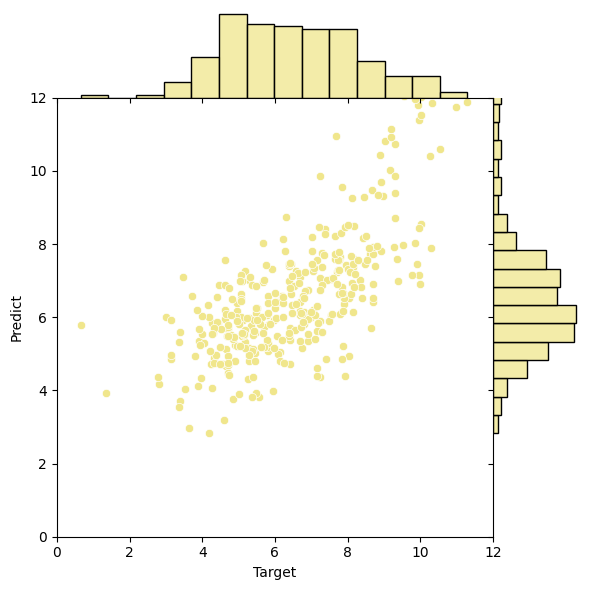

In [5]:
grid = sns.jointplot(
    data=pred_df, x='Target', y='Predict', color='khaki', space=0.0, ylim=(0, 12), xlim=(0, 12)
    )

In [6]:
grid.set_axis_labels("Actual Values of Affinity", "Predicted Values of Affinity")
grid.ax_joint.text(0.5, 11, "RMSE:1.335 Pearson's r:0.724")
grid.savefig("../../../images/EMPDTA_PDBbind_0519.png")

## Molecule and Protein graph visualization

### Protein graph of AF-Q2M2I8-F1-model_v4.pdb

In [1]:
import pickle
from torchdrug import utils, data

In [2]:
protein_pkl = '../../../data/dta-datasets/Davis/gearnetesm_pocket_Protein.pkl'
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [3]:
target_pocket = protein_list[0]
target_pocket

PackedProtein(batch_size=1, num_atoms=[74], num_bonds=[647], num_residues=[74])

In [ ]:
target_pocket.visualize(save_file="../../../images/Q2M2I8.png")

### Molecule graph of PubChem ID 11314340

In [1]:
import pickle
from torchdrug import utils, data

In [2]:
molecule_pkl = '../../../data/dta-datasets/Davis/distanceMol_Molecule.pkl'
with utils.smart_open(molecule_pkl, "rb") as fin:
    molecule_list = pickle.load(fin)

In [3]:
len(molecule_list)

68

In [4]:
drug_molecule = molecule_list[0]
drug_molecule

Molecule(num_atom=27, num_bond=60)

In [5]:
drug_molecule.visualize(save_file="../../../images/11314340.png")